<a href="https://colab.research.google.com/github/nadhifahlutfiyah/PCVK_GENAP_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAKTIKUM FILTER**

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:

a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as img

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

In [3]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # proses konvolusi
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
      
  return new_image

d. Load citra yang akan diproses dan ubah menjadi citra keabuan

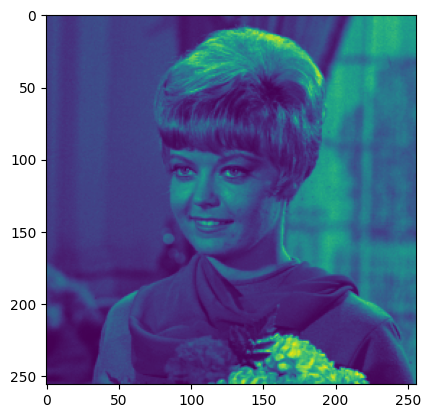

In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray)

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

In [5]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                          [0,-1,0]])


f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:

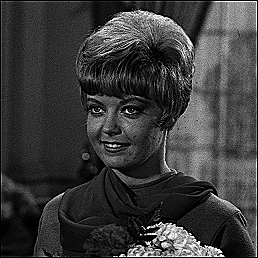

In [6]:
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:

**Sharpen**

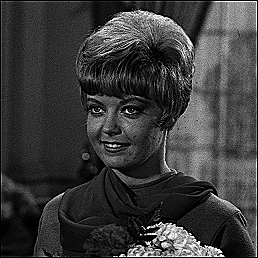

In [7]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

**Emboss**

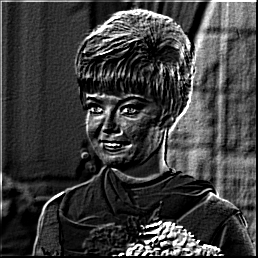

In [8]:
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

**Left Sobel Edge Detection**

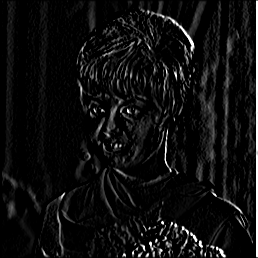

In [9]:
kernel_sobel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])

cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

**Canny Edge Detection**

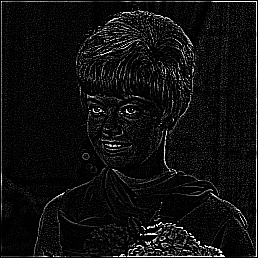

In [10]:
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

cv2_imshow(convolution2d(img_gray, kernel_canny, 1, 2))

**Prewitt Edge Detection**

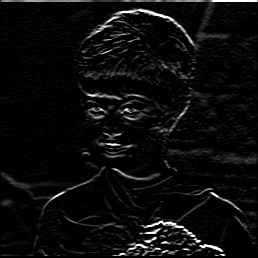

In [14]:
kernel_prewitt = np.array([[-1,-1,-1],
                         [0,0,0],
                         [1,1,1]])

cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

**5x5 Gaussian Blur**

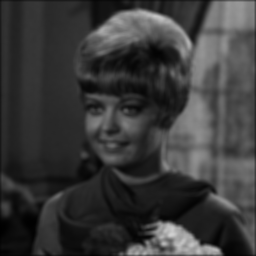

In [12]:
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

**21x21 Gaussian Blur**

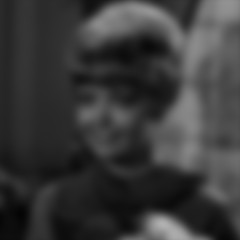

In [11]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))